In [1]:
import numpy as np
import pandas as pd

In [2]:
#Mount the G Drive to access the data set
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
train_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/train_baseline_fix_index.csv'
test_path = '/content/drive/MyDrive/Colab Notebooks/FP-DM/dataset/test_baseline_fix_index.csv'
train_df = pd.read_csv(train_path, encoding= 'unicode_escape')
test_df = pd.read_csv(test_path, encoding= 'unicode_escape')
merged_df = train_df.append([test_df])

In [4]:
train_df.drop(['Unnamed: 0'], inplace=True, axis=1)
train_df

,sentence #,word,tag,word_idx,tag_idx
0,1,Berikut,O,7983,0
1,1,adalah,O,2039,0
2,1,tujuh,O,4980,0
3,1,kota,O,41,0
4,1,di,O,4961,0
...,...,...,...,...,...
30243,1464,kita,O,4705,0
30244,1464,",",O,7275,0
30245,1464,ucap,O,7791,0
30246,1464,Fadli,B-PER,855,4


In [5]:
test_df.drop(['Unnamed: 0'], inplace=True, axis=1)
test_df

,sentence #,word,tag,word_idx,tag_idx
0,1,Meski,O,4549,0
1,1,demikian,O,4487,0
2,1,",",O,7275,0
3,1,ia,O,5670,0
4,1,menegaskan,O,5148,0
...,...,...,...,...,...
18446,509,keluarga,O,3747,0
18447,509,-lah,O,2169,0
18448,509,",",O,7275,0
18449,509,ujarnya,O,3526,0


In [6]:
merged_df.drop(['Unnamed: 0'], inplace=True, axis=1)
merged_df

,sentence #,word,tag,word_idx,tag_idx
0,1,Berikut,O,7983,0
1,1,adalah,O,2039,0
2,1,tujuh,O,4980,0
3,1,kota,O,41,0
4,1,di,O,4961,0
...,...,...,...,...,...
18446,509,keluarga,O,3747,0
18447,509,-lah,O,2169,0
18448,509,",",O,7275,0
18449,509,ujarnya,O,3526,0


In [7]:
# importing the module
import json
 
# Opening JSON file
def loadJSON(filename):
  data = {}
  with open(filename) as json_file:
      data = json.load(json_file)
  return data

In [8]:
idx2tag = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2tag.json')
tag2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/tag2idx.json')
token2idx = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/token2idx.json')
idx2token = loadJSON('/content/drive/MyDrive/Colab Notebooks/FP-DM/output/idx2token.json')
print(idx2tag)

{'0': 'O', '1': 'I-LOC', '2': 'B-ORG', '3': 'I-PER', '4': 'B-PER', '5': 'I-ORG', '6': 'B-LOC'}


In [9]:
tag2idx = dict([key, int(value)] for key, value in tag2idx.items())
token2idx = dict([key, int(value)] for key, value in token2idx.items())
idx2tag = dict([int(key), value] for key, value in idx2tag.items())
idx2token = dict([int(key), value] for key, value in idx2token.items())
tag2idx

{'B-LOC': 6,
 'B-ORG': 2,
 'B-PER': 4,
 'I-LOC': 1,
 'I-ORG': 5,
 'I-PER': 3,
 'O': 0}

In [10]:
# Groupby and collect columns
train_group = train_df.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))
test_group = test_df.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))
merged_group = merged_df.groupby(['sentence #'], as_index=False)['word', 'tag', 'word_idx', 'tag_idx'].agg(lambda x: list(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [11]:
train_group

,sentence #,word,tag,word_idx,tag_idx
0,1,"[Berikut, adalah, tujuh, kota, di, Indonesia, ...","[O, O, O, O, O, B-LOC, O, O, O, O, O, O, O]","[7983, 2039, 4980, 41, 4961, 1745, 5214, 5262,...","[0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0]"
1,2,"[Soal, calon, presiden, itu, urusan, nanti, ,,...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, B-P...","[3711, 8327, 3000, 5216, 4847, 865, 7275, 5214...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, ..."
2,3,"[Kalau, itu, tanya, PPP, saja, ,, ujar, Nasir,...","[O, O, O, B-ORG, O, O, O, B-PER, O, O, O, O, O...","[5035, 5216, 5722, 7446, 5829, 7275, 5990, 108...","[0, 0, 0, 2, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,"[Jokowi, bisa, mengatakan, mencabut, pengaduan...","[B-PER, O, O, O, O, O, O, O, O, O, O]","[8234, 3106, 3220, 2834, 4775, 652, 3257, 2096...","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,5,"[Akbar, menyebutkan, pemerintahan, Jokowi-JK, ...","[B-PER, O, O, O, O, O, O, O, O, O, O, O, O, O,...","[4662, 5284, 5706, 3052, 6288, 2366, 7513, 268...","[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...
1459,1460,"[Dia, menggantikan, Ian, Campbell, ,, yang, di...","[O, O, B-PER, I-PER, O, O, O, O, O, O, O, O, O...","[7122, 3901, 2733, 1094, 7275, 5214, 5571, 445...","[0, 0, 4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1460,1461,"[Kita, siapkan, strategi, baru, ,, bukan, gant...","[O, O, O, O, O, O, O, O, O, O, O]","[5581, 5206, 2338, 7187, 7275, 3022, 7872, 527...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1461,1462,"[September, 2007, PTBA, akan, mensosialisasika...","[O, O, B-ORG, O, O, O, O, O, O, O, O, O, O, O,...","[1820, 9, 8170, 607, 1804, 5973, 1372, 2594, 4...","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1462,1463,"[Sedang, infeksi, virus, ebola, ini, berlangsu...","[O, O, O, O, O, O, O, O, O, O, O, O, O]","[2118, 8069, 1844, 4255, 452, 3596, 7595, 652,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [12]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [13]:
def get_pad(dataset_grouped, merged_data, maxlen):

    #get max token and tag length
    n_token = len(list(set(merged_data['word'].to_list())))
    n_tags = len(list(set(merged_data['tag'].to_list())))

    #Pad tokens (X var)    
    tokens = dataset_grouped['word_idx'].tolist()
    # maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= token2idx["ENDPAD"])

    #Pad Tags (y var) and convert it into one hot encoding
    tags = dataset_grouped['tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]

    return pad_tokens, pad_tags, n_token

In [14]:
train_tokens, train_tags, n_token = get_pad(train_group, merged_df, 60)
test_tokens,  test_tags, _ = get_pad(test_group, merged_df, 60)
train_tags = np.array(train_tags)
test_tags = np.array(test_tags)
print('train_tags: ',train_tags.shape,'test_tags: ',test_tags.shape)

train_tags:  (1464, 60, 7) test_tags:  (509, 60, 7)


In [15]:
from sklearn.utils import class_weight

train_temp_tags = np.ravel(np.argmax(train_tags, axis=-1))
print(len(train_temp_tags))

87840


In [16]:
class_weights = class_weight.compute_class_weight(
    class_weight ='balanced', 
    classes = np.unique(train_temp_tags), 
    y = train_temp_tags
    )
class_weight_dict = dict(enumerate(class_weights))
print(class_weight_dict)

train_label = np.argmax(train_tags, axis=-1)
print(train_tokens.shape)
print(train_label.shape)

{0: 0.1488172888281994, 1: 48.07881773399015, 2: 17.428571428571427, 3: 25.82010582010582, 4: 14.005102040816327, 5: 21.785714285714285, 6: 21.672834937083643}
(1464, 60)
(1464, 60)


Import Embedding Model yang sudah dilatih sebelumnya untuk mendapatkan bobot embedding matrix dari layer Embedding

In [17]:
! pip install glove-python-binary

In [18]:
from glove import Corpus, Glove
glove_model = Glove.load('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/glove5_300_100.txt')

In [19]:
# Get the embedding matrix from Glove Model
def glove_embedding():
  embedding_matrix = np.zeros((len(token2idx) + 1, 300))
  for word, i in token2idx.items():
    embedding_vector = glove_model.word_vectors[glove_model.dictionary[word]]
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  return embedding_matrix

Word2vec Embedding Model

In [20]:
from gensim.models import KeyedVectors

w2v_model = KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/w2v5_300_100.bin')

In [21]:
def w2v_embedding():
  embedding_matrix = np.zeros((len(token2idx) + 1, 300))
  for word, i in token2idx.items():
    try:
      embedding_vector = w2v_model[word]
    except:
      continue
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  return embedding_matrix

FastText Word Embedding Model

In [22]:
from gensim.models import KeyedVectors

fasttext_model = KeyedVectors.load('/content/drive/MyDrive/Colab Notebooks/FP-DM/models/word_embeddings/FastText5_300_100.bin')

In [23]:
def fasttext_embedding():
  embedding_matrix = np.zeros((len(token2idx) + 1, 300))
  for word, i in token2idx.items():
    try:
      embedding_vector = fasttext_model[word]
    except:
      continue
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  return embedding_matrix

Keras Embedding Model

In [24]:
import tensorflow as tf

keras_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FP-DM/model/LSTM_baseline_300.h5')
keras_weights = keras_model.get_layer("embedding").get_weights()[0]

In [25]:
def keras_embedding():
  embedding_matrix = np.zeros((len(token2idx) + 1, 300))
  for word, i in token2idx.items():
    try:
      embedding_vector = keras_weights[i]
    except:
      continue
    if embedding_vector is not None:
      embedding_matrix[i] = embedding_vector
  return embedding_matrix

In [26]:
embedding_matrix = keras_embedding()

In [27]:
# input_dim = len(token2idx) + 1
# output_dim = 300
# input_length = 60
# n_tags = 7

filter_sizes = 3
num_filter = 128
input_dim = len(token2idx)+1
output_dim = 300
input_length = 60
n_tags = len(tag2idx)
input_we = len(token2idx)+1

In [28]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Input, SpatialDropout1D, SimpleRNN, GRU, Conv1D
from tensorflow.keras.utils import plot_model
from tensorflow import keras

In [29]:
embedding_layer = Embedding(input_dim=input_dim,
                            output_dim=output_dim,
                            input_length=input_length,
                            weights=[embedding_matrix],
                            trainable=False)

In [30]:
def get_lstm_model():
    model = Sequential()
    model.add(embedding_layer)
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))
    model.add(Dropout(0.5))
    model.add(Dense(n_tags, activation="softmax"))

    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    model.summary()
    
    return model

In [31]:
def get_cnn_model():
  model = Sequential()
  model.add(embedding_layer)
  model.add(Conv1D(num_filter, 3, activation='relu', padding='same'))
  model.add(Dropout(0.5))
  model.add(Dense(n_tags, activation="softmax"))

  opt = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  model.summary()
  
  return model

In [32]:
print(class_weight_dict)
sample_weights = np.ones(shape=(len(train_label), train_label.shape[-1]))
for i in range(17):
    sample_weights[train_label == i] = class_weight_dict.get(i)
print(sample_weights.shape)

{0: 0.1488172888281994, 1: 48.07881773399015, 2: 17.428571428571427, 3: 25.82010582010582, 4: 14.005102040816327, 5: 21.785714285714285, 6: 21.672834937083643}
(1464, 60)


In [33]:
nlp_model = get_cnn_model()
plot_model(nlp_model)
his = nlp_model.fit(train_tokens, train_label , batch_size = 64, epochs=25, validation_split=0.2, sample_weight = sample_weights)
tf.keras.models.save_model(nlp_model, filepath  = '/content/drive/MyDrive/Colab Notebooks/FP-DM/model/CNN_keras_300_100.h5')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 60, 300)           2563200   
                                                                 
 conv1d (Conv1D)             (None, 60, 128)           115328    
                                                                 
 dropout (Dropout)           (None, 60, 128)           0         
                                                                 
 dense (Dense)               (None, 60, 7)             903       
                                                                 
Total params: 2,679,431
Trainable params: 116,231
Non-trainable params: 2,563,200
_________________________________________________________________
Epoch 1/25
19/19 [==============================] - 2s 80ms/step - loss: 0.3378 - accuracy: 0.9130 - val_loss: 1.3761 - val_accuracy: 0.9600
Epoch 2/25
19/19 [=============

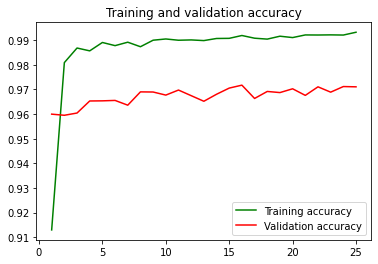

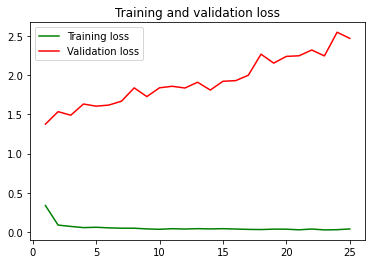

In [34]:
# Plot results
import matplotlib.pyplot as plt

accuracy = his.history['accuracy']
val_acc = his.history['val_accuracy']
loss = his.history['loss']
val_loss = his.history['val_loss']

epochs = range(1, len(accuracy)+1)

plt.plot(epochs, accuracy, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [35]:
nlp_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/FP-DM/model/CNN_keras_300_100.h5')

y_test = np.argmax(test_tags, axis=-1)
print(test_tokens.shape,y_test.shape)
nlp_model.evaluate(test_tokens, y_test)

(509, 60) (509, 60)
16/16 [==============================] - 0s 13ms/step - loss: 0.2892 - accuracy: 0.9525


[0.28923213481903076, 0.9524558186531067]

In [36]:
y_pred = nlp_model.predict(test_tokens)
y_pred = np.argmax(y_pred, axis= -1)

In [37]:
y_test_list = []
y_pred_list = []
for row in range(0, y_test.shape[0]):
  y_pred_list = np.concatenate((y_pred_list, y_pred[row]), axis=0)
  y_test_list = np.concatenate((y_test_list, y_test[row]), axis=0)

In [38]:
data_prediction = pd.DataFrame({'actual_class': y_test_list, 'predicted_class': y_pred_list})
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)
data_prediction

,actual_class,predicted_class
0,O,O
1,O,O
2,O,O
3,O,O
4,O,O
...,...,...
30535,O,O
30536,O,O
30537,O,O
30538,O,O


In [39]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

actual_class,B-LOC,B-ORG,B-PER,I-LOC,I-ORG,I-PER,O
predicted_class,,,,,,,
B-LOC,224,10,1,12,4,0,170
B-ORG,5,497,16,4,15,0,123
B-PER,0,3,451,5,0,31,66
I-LOC,4,10,21,101,38,49,260
I-ORG,0,6,21,14,306,3,122
I-PER,0,0,14,3,0,192,36
O,20,54,196,20,45,51,27317


In [40]:
from sklearn.metrics import classification_report
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], labels=['O', 'I-LOC', 'B-ORG', 'I-PER', 'B-PER', 'I-ORG', 'B-LOC'], output_dict=True)).T

,precision,recall,f1-score,support
O,0.986066,0.972343,0.979157,28094.000000
I-LOC,0.209110,0.635220,0.314642,159.000000
B-ORG,0.753030,0.856897,0.801613,580.000000
I-PER,0.783673,0.588957,0.672504,326.000000
B-PER,0.811151,0.626389,0.706897,720.000000
I-ORG,0.648305,0.750000,0.695455,408.000000
B-LOC,0.532067,0.885375,0.664688,253.000000
accuracy,0.952456,0.952456,0.952456,0.952456
macro avg,0.674772,0.759312,0.690708,30540.000000
weighted avg,0.963038,0.952456,0.956238,30540.000000


Bagaimana jika data padding diabaikan saat menghitung confusion matrix?

In [41]:
y_pred_list = y_pred.tolist()
y_test_list = y_test.tolist()

In [42]:
# Clean the test and pred data from padding data
clean_pred = []
clean_test = []
for row in range(0, test_tokens.shape[0]):
  # print(row, test_tokens[row])
  pad_list = []
  for i in range(0, len(test_tokens[row])):
    if(test_tokens[row][i] == token2idx['ENDPAD']):
      pad_list.append(i)

  pad_list.sort(reverse=True)
  for idx in pad_list:
  #   clean_pred[row] = clean_pred[row] + np.delete(y_pred[row], idx)
  #   clean_test[row] = clean_test[row] + np.delete(y_test[row], idx)
    y_pred_list[row].pop(idx)
    y_test_list[row].pop(idx)

In [43]:
y_test_rows = []
y_pred_rows = []
for row in range(0, y_test.shape[0]):
  # y_pred_list = y_pred_list + y_pred[row]
  y_test_rows = np.concatenate((y_test_rows, y_test_list[row]), axis=0)
  y_pred_rows = np.concatenate((y_pred_rows, y_pred_list[row]), axis=0)

In [44]:
data_prediction = pd.DataFrame({'actual_class': y_test_rows, 'predicted_class': y_pred_rows})
data_prediction['actual_class'] = data_prediction['actual_class'].map(idx2tag)
data_prediction['predicted_class'] = data_prediction['predicted_class'].map(idx2tag)
data_prediction

,actual_class,predicted_class
0,O,O
1,O,O
2,O,O
3,O,O
4,O,O
...,...,...
17985,O,O
17986,O,I-LOC
17987,O,O
17988,O,O


In [45]:
confusion_matrix = pd.crosstab(data_prediction['predicted_class'], data_prediction['actual_class'])
confusion_matrix

actual_class,B-LOC,B-ORG,B-PER,I-LOC,I-ORG,I-PER,O
predicted_class,,,,,,,
B-LOC,224,10,1,12,4,0,170
B-ORG,5,497,16,4,15,0,123
B-PER,0,3,451,5,0,31,66
I-LOC,4,10,21,101,38,49,260
I-ORG,0,6,21,14,306,3,122
I-PER,0,0,14,3,0,192,36
O,20,54,196,20,45,51,14767


In [46]:
pd.DataFrame(classification_report(data_prediction['actual_class'], data_prediction['predicted_class'], labels=['O', 'I-LOC', 'B-ORG', 'I-PER', 'B-PER', 'I-ORG', 'B-LOC'], output_dict=True)).T

,precision,recall,f1-score,support
O,0.974526,0.950013,0.962114,15544.000000
I-LOC,0.209110,0.635220,0.314642,159.000000
B-ORG,0.753030,0.856897,0.801613,580.000000
I-PER,0.783673,0.588957,0.672504,326.000000
B-PER,0.811151,0.626389,0.706897,720.000000
I-ORG,0.648305,0.750000,0.695455,408.000000
B-LOC,0.532067,0.885375,0.664688,253.000000
accuracy,0.919288,0.919288,0.919288,0.919288
macro avg,0.673123,0.756122,0.688273,17990.000000
weighted avg,0.937002,0.919288,0.925524,17990.000000
